In [1]:
import pandas as pd
import seaborn as sns
import json
import json
from pandas.io.json import json_normalize
from datetime import datetime as dt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df= pd.read_csv('File/train.csv')

pd.set_option('display.max_columns', None)

C:\Users\tg248\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [4]:
df.isnull().sum()

channelGrouping         0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
sessionId               0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [6]:
df.shape

(903653, 12)

In [7]:
# Function to convert json columns to dataframe

def json_to_dataframe(data, json_columns):
  for column in json_columns:
    column_to_df= json_normalize([json.loads(x) for x in data[column]])
    data= data.drop(column, axis=1).merge(column_to_df, right_index=True, left_index=True)
  return data

In [8]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
df=json_to_dataframe(df, json_columns)

<ipython-input-7-764412cc0df2>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  column_to_df= json_normalize([json.loads(x) for x in data[column]])


In [9]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not 

In [10]:
df.isnull().sum()

channelGrouping                             0
date                                        0
fullVisitorId                               0
sessionId                                   0
socialEngagementType                        0
visitId                                     0
visitNumber                                 0
visitStartTime                              0
browser                                     0
browserVersion                              0
browserSize                                 0
operatingSystem                             0
operatingSystemVersion                      0
isMobile                                    0
mobileDeviceBranding                        0
mobileDeviceModel                           0
mobileInputSelector                         0
mobileDeviceInfo                            0
mobileDeviceMarketingName                   0
flashVersion                                0
language                                    0
screenColors                      

In [11]:
# Defining a function to describe each column

def data_description(dataframe):
  print("DataSet Shape: ", dataframe.shape)
  description= pd.DataFrame(dataframe.dtypes, columns=['dtypes'])
  description= description.reset_index()
  description['Name Of Column']= description['index']
  description= description[['Name Of Column', 'dtypes']]
  description['Missing Values']= dataframe.isnull().sum().values
  description['Unique Values']= dataframe.nunique().values

  return description

In [12]:
data_description(df)

DataSet Shape:  (903653, 55)


,Name Of Column,dtypes,Missing Values,Unique Values
0,channelGrouping,object,0,8
1,date,int64,0,366
2,fullVisitorId,object,0,742735
3,sessionId,object,0,902755
4,socialEngagementType,object,0,1
5,visitId,int64,0,886303
6,visitNumber,int64,0,384
7,visitStartTime,int64,0,887159
8,browser,object,0,54
9,browserVersion,object,0,1


In [13]:
# Function for analysing the null values

def null_column_count(df):
    df_null = df.isnull().sum().sort_values(ascending = False).rename('Null').reset_index()

    null_count = df_null['Null']
    null_percent = (null_count * 100) / (df.shape[0])

    df_null = pd.concat([df_null['index'],null_count,null_percent], axis=1, keys=['Column','Null_Count','Null_Percent'])

    return df_null[df_null['Null_Count'] != 0]

In [14]:
null_column_count(df)

,Column,Null_Count,Null_Percent
0,campaignCode,903652,99.999889
1,adContent,892707,98.788694
2,transactionRevenue,892138,98.725728
3,adwordsClickInfo.isVideoAd,882193,97.625195
4,adwordsClickInfo.adNetworkType,882193,97.625195
5,adwordsClickInfo.slot,882193,97.625195
6,adwordsClickInfo.page,882193,97.625195
7,adwordsClickInfo.gclId,882092,97.614018
8,isTrueDirect,629648,69.678073
9,referralPath,572712,63.377425


In [15]:
# Lets describe a function to fill NULL Values

def fill_null(dataframe):
  dataframe['pageviews'].fillna(1, inplace=True)
  dataframe['newVisits'].fillna(0, inplace=True)
  dataframe['bounces'].fillna(0, inplace=True) 
  dataframe["transactionRevenue"].fillna(0.0, inplace=True)


  # Converting the datatype from object to necessary
  dataframe['pageviews'] = dataframe['pageviews'].astype(int)
  dataframe['newVisits'] = dataframe['newVisits'].astype(int)
  dataframe['bounces'] = dataframe['bounces'].astype(int)
  dataframe["transactionRevenue"] = dataframe["transactionRevenue"].astype(float)
  dataframe['fullVisitorId'] = dataframe['fullVisitorId'].astype(float)
  dataframe['sessionId'] = dataframe['sessionId'].astype(float)


  dataframe['isTrueDirect'].fillna(False, inplace=True) 
  dataframe['adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
  dataframe[df['city'] == "(not set)"]['city'] = np.nan
  dataframe['city'].fillna("NaN", inplace=True)

  return dataframe

In [16]:
# Lets create a Function to drop Null Columns
def drop_null(dataframe):
  dataframe.drop(list(null_column_count(dataframe)['Column']), axis=1,inplace=True)
  return dataframe

In [17]:
df= fill_null(df)
df= drop_null(df)

<ipython-input-15-03541f2a2bc6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[df['city'] == "(not set)"]['city'] = np.nan


In [18]:
# Handling the datetime column

def date_time(dataframe):
  dataframe["date"] = pd.to_datetime(dataframe["date"], format="%Y%m%d") # seting the column as pandas datetime
  dataframe["weekday"] = dataframe['date'].dt.weekday #extracting week day
  dataframe["day"] = dataframe['date'].dt.day # extracting day
  dataframe["month"] = dataframe['date'].dt.month # extracting day
  dataframe["year"] = dataframe['date'].dt.year # extracting day
  dataframe['visitHour'] = (dataframe['visitStartTime'].apply(lambda x: str(dt.fromtimestamp(x).hour))).astype(int)
    
  return dataframe


In [19]:
date_time(df)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,adwordsClickInfo.criteriaParameters,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
0,Organic Search,2016-09-02,1.131660e+18,1.131660e+28,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,0.0,(not set),google,organic,not available in demo dataset,False,True,4,2,9,2016,21
1,Organic Search,2016-09-02,3.773060e+17,3.773060e+27,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,0.0,(not set),google,organic,not available in demo dataset,False,True,4,2,9,2016,10
2,Organic Search,2016-09-02,3.895546e+18,3.895546e+28,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,0.0,(not set),google,organic,not available in demo dataset,False,True,4,2,9,2016,6
3,Organic Search,2016-09-02,4.763447e+18,4.763447e+28,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,0.0,(not set),google,organic,not available in demo dataset,False,True,4,2,9,2016,11
4,Organic Search,2016-09-02,2.729444e+16,2.729444e+26,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo 

In [20]:
# Removing Columns that have only single unique value

def rem_cols(dataframe):
  constant_columns = [col for col in dataframe.columns if dataframe[col].nunique() == 1]
  print(f'Columns : {constant_columns}, \n Num of Columns : {len(constant_columns)}')
  dataframe.drop(constant_columns, axis=1, inplace=True)

  return dataframe

In [21]:
rem_cols(df)

Columns : ['socialEngagementType', 'browserVersion', 'browserSize', 'operatingSystemVersion', 'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors', 'screenResolution', 'cityId', 'latitude', 'longitude', 'networkLocation', 'visits', 'adwordsClickInfo.criteriaParameters'], 
 Num of Columns : 19


,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
0,Organic Search,2016-09-02,1.131660e+18,1.131660e+28,1472830385,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,21
1,Organic Search,2016-09-02,3.773060e+17,3.773060e+27,1472880147,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,10
2,Organic Search,2016-09-02,3.895546e+18,3.895546e+28,1472865386,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,6
3,Organic Search,2016-09-02,4.763447e+18,4.763447e+28,1472881213,1,1472881213,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,11
4,Organic Search,2016-09-02,2.729444e+16,2.729444e+26,1472822600,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,0,0.0,(not set),google,organic,True,True,4,2,9,2016,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,2017-01-04,5.123779e+18,5.123779e+28,1483554750,1,1483554750,Chrome,Windows,False,desktop,Americas,Caribbean,Puerto Rico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prtc.net,17,15,0,1,0.0,(not set),youtube.com,referral,False,True,2,4,1,2017,0
903649,Social,2017-01-04,7.231729e+18,7.231729e+28,1483543798,1,1483543798,Chrome,Android,True,mobile,Asia,Southern Asia,Sri Lanka,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,18,13,0,1,0.0,(not set),youtube.com,referral,False,True,2,4,1,2017,20
903650,Social,2017-01-04,5.744577e+18,5.744577e+28,1483526434,1,1483526434,Android Webview,Android,True,mobile,Asia,Eastern Asia,South Korea,Seoul,(not set),Seoul,unknown.unknown,24,21,0,1,0.0,(not set),youtube.com,referral,False,True,2,4,1,2017,16
903651,Social,2017-01-04,2.709355e+18,2.709355e+28,1483592857,1,1483592864,Chrome,Windows,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,24,22,0,1,0.0,(not set),facebook.com,referral,False,True,2,4,1,2017,10


DataSet After Cleaning And Processing

In [22]:
data_description(df)


DataSet Shape:  (903653, 33)


,Name Of Column,dtypes,Missing Values,Unique Values
0,channelGrouping,object,0,8
1,date,datetime64[ns],0,366
2,fullVisitorId,float64,0,714167
3,sessionId,float64,0,714168
4,visitId,int64,0,886303
5,visitNumber,int64,0,384
6,visitStartTime,int64,0,887159
7,browser,object,0,54
8,operatingSystem,object,0,20
9,isMobile,bool,0,2


In [23]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
0,Organic Search,2016-09-02,1.131660e+18,1.131660e+28,1472830385,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,21
1,Organic Search,2016-09-02,3.773060e+17,3.773060e+27,1472880147,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,10
2,Organic Search,2016-09-02,3.895546e+18,3.895546e+28,1472865386,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,6
3,Organic Search,2016-09-02,4.763447e+18,4.763447e+28,1472881213,1,1472881213,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,11
4,Organic Search,2016-09-02,2.729444e+16,2.729444e+26,1472822600,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,0,0.0,(not set),google,organic,True,True,4,2,9,2016,18


In [24]:
# Lets convert categorical features into numerical 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['channelGrouping'] = labelencoder.fit_transform(df['channelGrouping'])

df


,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
0,4,2016-09-02,1.131660e+18,1.131660e+28,1472830385,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,21
1,4,2016-09-02,3.773060e+17,3.773060e+27,1472880147,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,10
2,4,2016-09-02,3.895546e+18,3.895546e+28,1472865386,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,6
3,4,2016-09-02,4.763447e+18,4.763447e+28,1472881213,1,1472881213,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,1,0.0,(not set),google,organic,False,True,4,2,9,2016,11
4,4,2016-09-02,2.729444e+16,2.729444e+26,1472822600,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,0,0.0,(not set),google,organic,True,True,4,2,9,2016,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,7,2017-01-04,5.123779e+18,5.123779e+28,1483554750,1,1483554750,Chrome,Windows,False,desktop,Americas,Caribbean,Puerto Rico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prtc.net,17,15,0,1,0.0,(not set),youtube.com,referral,False,True,2,4,1,2017,0
903649,7,2017-01-04,7.231729e+18,7.231729e+28,1483543798,1,1483543798,Chrome,Android,True,mobile,Asia,Southern Asia,Sri Lanka,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,18,13,0,1,0.0,(not set),youtube.com,referral,False,True,2,4,1,2017,20
903650,7,2017-01-04,5.744577e+18,5.744577e+28,1483526434,1,1483526434,Android Webview,Android,True,mobile,Asia,Eastern Asia,South Korea,Seoul,(not set),Seoul,unknown.unknown,24,21,0,1,0.0,(not set),youtube.com,referral,False,True,2,4,1,2017,16
903651,7,2017-01-04,2.709355e+18,2.709355e+28,1483592857,1,1483592864,Chrome,Windows,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,24,22,0,1,0.0,(not set),facebook.com,referral,False,True,2,4,1,2017,10


In [25]:
# Lets convert remaining categorical features into numerical ones

def Num_to_cate(df):
     
    labelencoder = LabelEncoder()
     
    for column in df.columns:
        print(column)
        if (type(df[column][0]) == str or type(df[column][0])== np.bool_ ):
            df[column] = labelencoder.fit_transform(df[column])
    
    return df




In [27]:
df=Num_to_cate(df)

channelGrouping
date
fullVisitorId
sessionId
visitId
visitNumber
visitStartTime
browser
operatingSystem
isMobile
deviceCategory
continent
subContinent
country
region
metro
city
networkDomain
hits
pageviews
bounces
newVisits
transactionRevenue
campaign
source
medium
isTrueDirect
adwordsClickInfo.isVideoAd
weekday
day
month
year
visitHour


In [28]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
0,4,2016-09-02,1.131660e+18,1.131660e+28,1472830385,1,1472830385,11,16,0,0,3,21,204,150,0,258,24932,0,1,1,1,0.0,0,149,5,0,1,4,2,9,2016,21
1,4,2016-09-02,3.773060e+17,3.773060e+27,1472880147,1,1472880147,16,7,0,0,5,1,12,375,93,648,6673,0,1,1,1,0.0,0,149,5,0,1,4,2,9,2016,10
2,4,2016-09-02,3.895546e+18,3.895546e+28,1472865386,1,1472865386,11,16,0,0,4,19,181,78,0,325,25841,0,1,1,1,0.0,0,149,5,0,1,4,2,9,2016,6
3,4,2016-09-02,4.763447e+18,4.763447e+28,1472881213,1,1472881213,46,6,0,0,3,16,94,375,93,648,25841,0,1,1,1,0.0,0,149,5,0,1,4,2,9,2016,11
4,4,2016-09-02,2.729444e+16,2.729444e+26,1472822600,2,1472822600,11,1,1,1,4,13,211,375,93,648,25841,0,1,1,0,0.0,0,149,5,1,1,4,2,9,2016,18


In [29]:
# lets drop some more columns that are not required.

df=df.drop('date',axis=1)  # Lets Drop date column as it extracted into day,week and year
df=df.drop('visitStartTime',axis=1)# Lets Drop time column as it extracted into visitHour

In [30]:
df.shape

(903653, 31)

In [31]:
df.head()

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
0,4,1.131660e+18,1.131660e+28,1472830385,1,11,16,0,0,3,21,204,150,0,258,24932,0,1,1,1,0.0,0,149,5,0,1,4,2,9,2016,21
1,4,3.773060e+17,3.773060e+27,1472880147,1,16,7,0,0,5,1,12,375,93,648,6673,0,1,1,1,0.0,0,149,5,0,1,4,2,9,2016,10
2,4,3.895546e+18,3.895546e+28,1472865386,1,11,16,0,0,4,19,181,78,0,325,25841,0,1,1,1,0.0,0,149,5,0,1,4,2,9,2016,6
3,4,4.763447e+18,4.763447e+28,1472881213,1,46,6,0,0,3,16,94,375,93,648,25841,0,1,1,1,0.0,0,149,5,0,1,4,2,9,2016,11
4,4,2.729444e+16,2.729444e+26,1472822600,2,11,1,1,1,4,13,211,375,93,648,25841,0,1,1,0,0.0,0,149,5,1,1,4,2,9,2016,18


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   channelGrouping             903653 non-null  int32  
 1   fullVisitorId               903653 non-null  float64
 2   sessionId                   903653 non-null  float64
 3   visitId                     903653 non-null  int64  
 4   visitNumber                 903653 non-null  int64  
 5   browser                     903653 non-null  int32  
 6   operatingSystem             903653 non-null  int32  
 7   isMobile                    903653 non-null  int64  
 8   deviceCategory              903653 non-null  int32  
 9   continent                   903653 non-null  int32  
 10  subContinent                903653 non-null  int32  
 11  country                     903653 non-null  int32  
 12  region                      903653 non-null  int32  
 13  metro         

In [33]:
# Lets normalize all the columns

from sklearn.preprocessing import MinMaxScaler

x= df.values
min_max_scaler = MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled,columns=['channelGrouping', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'continent', 'subContinent', 'country', 'region',
       'metro', 'city', 'networkDomain', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue',  'campaign',
       'source', 'medium', 'isTrueDirect','adwordsClickInfo.isVideoAd','weekday', 'day', 'month',
       'year', 'visitHour'])

In [55]:
df.head()

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
0,0.571429,0.021770,0.021770,0.088405,0.000000,0.207547,0.842105,0.0,0.0,0.6,0.954545,0.923077,0.400,0.0,0.398148,0.888430,0.0,0.0,1.0,1.0,0.0,0.0,0.39314,0.833333,0.0,1.0,0.666667,0.033333,0.727273,0.0,0.913043
1,0.571429,0.007258,0.007258,0.089979,0.000000,0.301887,0.368421,0.0,0.0,1.0,0.045455,0.054299,1.000,1.0,1.000000,0.237786,0.0,0.0,1.0,1.0,0.0,0.0,0.39314,0.833333,0.0,1.0,0.666667,0.033333,0.727273,0.0,0.434783
2,0.571429,0.074939,0.074939,0.089512,0.000000,0.207547,0.842105,0.0,0.0,0.8,0.863636,0.819005,0.208,0.0,0.501543,0.920821,0.0,0.0,1.0,1.0,0.0,0.0,0.39314,0.833333,0.0,1.0,0.666667,0.033333,0.727273,0.0,0.260870
3,0.571429,0.091634,0.091634,0.090012,0.000000,0.867925,0.315789,0.0,0.0,0.6,0.727273,0.425339,1.000,1.0,1.000000,0.920821,0.0,0.0,1.0,1.0,0.0,0.0,0.39314,0.833333,0.0,1.0,0.666667,0.033333,0.727273,0.0,0.478261
4,0.571429,0.000525,0.000525,0.088159,0.002538,0.207547,0.052632,1.0,0.5,0.8,0.590909,0.954751,1.000,1.0,1.000000,0.920821,0.0,0.0,1.0,0.0,0.0,0.0,0.39314,0.833333,1.0,1.0,0.666667,0.033333,0.727273,0.0,0.782609


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   channelGrouping             903653 non-null  float64
 1   fullVisitorId               903653 non-null  float64
 2   sessionId                   903653 non-null  float64
 3   visitId                     903653 non-null  float64
 4   visitNumber                 903653 non-null  float64
 5   browser                     903653 non-null  float64
 6   operatingSystem             903653 non-null  float64
 7   isMobile                    903653 non-null  float64
 8   deviceCategory              903653 non-null  float64
 9   continent                   903653 non-null  float64
 10  subContinent                903653 non-null  float64
 11  country                     903653 non-null  float64
 12  region                      903653 non-null  float64
 13  metro         

In [57]:
y=df['transactionRevenue'].astype('int')

In [58]:
X=df.drop('transactionRevenue',axis=1)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   channelGrouping             903653 non-null  float64
 1   fullVisitorId               903653 non-null  float64
 2   sessionId                   903653 non-null  float64
 3   visitId                     903653 non-null  float64
 4   visitNumber                 903653 non-null  float64
 5   browser                     903653 non-null  float64
 6   operatingSystem             903653 non-null  float64
 7   isMobile                    903653 non-null  float64
 8   deviceCategory              903653 non-null  float64
 9   continent                   903653 non-null  float64
 10  subContinent                903653 non-null  float64
 11  country                     903653 non-null  float64
 12  region                      903653 non-null  float64
 13  metro         

In [61]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: transactionRevenue, dtype: int32

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   channelGrouping             903653 non-null  float64
 1   fullVisitorId               903653 non-null  float64
 2   sessionId                   903653 non-null  float64
 3   visitId                     903653 non-null  float64
 4   visitNumber                 903653 non-null  float64
 5   browser                     903653 non-null  float64
 6   operatingSystem             903653 non-null  float64
 7   isMobile                    903653 non-null  float64
 8   deviceCategory              903653 non-null  float64
 9   continent                   903653 non-null  float64
 10  subContinent                903653 non-null  float64
 11  country                     903653 non-null  float64
 12  region                      903653 non-null  float64
 13  metro         

In [ ]:
### Feature Selection Techniques-

#1)SelectKBest(this is also called as information gain) (sklearn.feature_selection import selectkbest)
#2)ExtraTreesClassifer (sklearn.ensemble import ExtraTreesClassifier)
#3)Mutual info classifier (this is also called as information gain) (sklearn.feature_selection import mutual_info_classif)

### To find correlation between features -

#1)Pearson Correlation (This is used so we can check which features are correlated with each other and hence we can remove one of them.)


In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [78]:
### Apply selectkbest algorithm

ordered_rank_features=SelectKBest(score_func=chi2, k=30)
ordered_feature=ordered_rank_features.fit(X,y)

In [79]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: transactionRevenue, dtype: int32

In [80]:
X.head()

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,campaign,source,medium,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
0,0.571429,0.021770,0.021770,0.088405,0.000000,0.207547,0.842105,0.0,0.0,0.6,0.954545,0.923077,0.400,0.0,0.398148,0.888430,0.0,0.0,1.0,1.0,0.0,0.39314,0.833333,0.0,1.0,0.666667,0.033333,0.727273,0.0,0.913043
1,0.571429,0.007258,0.007258,0.089979,0.000000,0.301887,0.368421,0.0,0.0,1.0,0.045455,0.054299,1.000,1.0,1.000000,0.237786,0.0,0.0,1.0,1.0,0.0,0.39314,0.833333,0.0,1.0,0.666667,0.033333,0.727273,0.0,0.434783
2,0.571429,0.074939,0.074939,0.089512,0.000000,0.207547,0.842105,0.0,0.0,0.8,0.863636,0.819005,0.208,0.0,0.501543,0.920821,0.0,0.0,1.0,1.0,0.0,0.39314,0.833333,0.0,1.0,0.666667,0.033333,0.727273,0.0,0.260870
3,0.571429,0.091634,0.091634,0.090012,0.000000,0.867925,0.315789,0.0,0.0,0.6,0.727273,0.425339,1.000,1.0,1.000000,0.920821,0.0,0.0,1.0,1.0,0.0,0.39314,0.833333,0.0,1.0,0.666667,0.033333,0.727273,0.0,0.478261
4,0.571429,0.000525,0.000525,0.088159,0.002538,0.207547,0.052632,1.0,0.5,0.8,0.590909,0.954751,1.000,1.0,1.000000,0.920821,0.0,0.0,1.0,0.0,0.0,0.39314,0.833333,1.0,1.0,0.666667,0.033333,0.727273,0.0,0.782609


In [82]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(X.columns)

In [83]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,channelGrouping,0.082166
1,fullVisitorId,0.027726
2,sessionId,0.027726
3,visitId,0.086952
4,visitNumber,116.286133
5,browser,0.004234
6,operatingSystem,0.124537
7,isMobile,0.264618
8,deviceCategory,0.149185
9,continent,0.037830


In [84]:
### Sorting by Score

features_rank.nlargest(10,'Score')

,Features,Score
4,visitNumber,116.286133
23,isTrueDirect,1.601165
16,hits,1.102080
17,pageviews,0.979994
19,newVisits,0.778021
18,bounces,0.498676
28,year,0.451020
29,visitHour,0.423960
7,isMobile,0.264618
26,day,0.259540


In [85]:
#### Feature Importance

## This technique will give you a score for each feature of your data. the higher the score more relevant it is.

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [87]:
model=ExtraTreesClassifier()


In [88]:
model.fit(X,y)

ExtraTreesClassifier()

In [89]:
print(model.feature_importances_)

[1.35213551e-02 3.60613849e-03 1.25358301e-02 1.02791943e-01
 1.77137717e-01 4.84905711e-03 7.65551071e-04 2.70402201e-06
 4.55418846e-05 1.29381240e-05 2.87216282e-05 5.08285285e-04
 8.52520100e-04 2.21174191e-04 1.97488838e-03 1.03110581e-02
 1.13577707e-01 1.70785018e-01 4.69725832e-05 2.79379102e-04
 0.00000000e+00 7.94965522e-03 1.51392446e-02 2.12661442e-03
 2.50023527e-04 7.92702301e-02 1.57378029e-01 6.03025582e-02
 5.71224710e-04 6.31579196e-02]


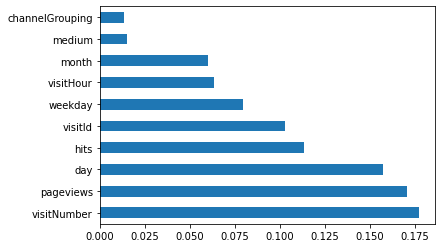

In [91]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [98]:
#### Pearson correlation

import seaborn as sns

### We are removing our dependent feature which is Y so we can  check the correlation between all independent features.
###corr=df.iloc[:,:-1].corr()
corr=X.corr()

In [99]:
df.corr()

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adwordsClickInfo.isVideoAd,weekday,day,month,year,visitHour
channelGrouping,1.000000,0.002198,0.002198,-0.220079,-0.036786,0.100722,0.036399,-0.230524,-0.212442,0.038485,0.062520,-0.045022,0.017231,-0.015544,-0.006504,0.111056,-0.080501,-0.070999,0.064069,0.082404,-0.006644,-0.242256,0.937980,0.820797,-0.467853,-0.032316,0.029092,-0.005097,0.188750,-0.235846,0.019797
fullVisitorId,0.002198,1.000000,1.000000,-0.000964,-0.023941,0.000776,0.001996,0.001728,0.001143,0.001870,-0.001011,-0.002077,0.001696,0.001146,0.002411,0.000184,0.000308,0.000049,-0.001235,0.001149,-0.000061,0.002418,0.003234,0.003282,-0.002611,0.000551,-0.000947,0.003558,0.000274,-0.000893,0.001208
sessionId,0.002198,1.000000,1.000000,-0.000964,-0.023941,0.000776,0.001996,0.001728,0.001143,0.001870,-0.001011,-0.002077,0.001696,0.001146,0.002411,0.000184,0.000308,0.000049,-0.001235,0.001149,-0.000061,0.002418,0.003234,0.003282,-0.002611,0.000551,-0.000947,0.003558,0.000274,-0.000893,0.001208
visitId,-0.220079,-0.000964,-0.000964,1.000000,0.002069,-0.067864,-0.009608,0.144332,0.132524,0.001315,-0.035841,-0.000887,0.015416,0.041114,0.029553,-0.077580,0.010787,-0.022261,-0.000131,-0.041035,0.002724,0.009502,-0.251546,-0.115635,0.073189,-0.029576,0.001757,0.065540,-0.502336,0.863070,-0.008617
visitNumber,-0.036786,-0.023941,-0.023941,0.002069,1.000000,-0.042932,0.007864,-0.037667,-0.035758,-0.064821,-0.025524,0.051706,-0.003071,0.015812,0.003480,-0.046550,0.024065,0.043338,-0.023754,-0.255077,0.051366,-0.006344,-0.047012,-0.031575,0.181692,-0.001332,-0.020131,-0.002789,-0.011275,0.007876,-0.006041
browser,0.100722,0.000776,0.000776,-0.067864,-0.042932,1.000000,0.183733,0.275995,0.287394,0.040210,0.031845,-0.004469,0.061179,-0.003976,0.024889,0.090068,-0.070434,-0.078562,0.063333,0.123634,-0.015120,-0.037042,0.128296,0.056020,-0.105121,-0.009391,0.054905,0.005374,0.085053,-0.088730,-0.003291
operatingSystem,0.036399,0.001996,0.001996,-0.009608,0.007864,0.183733,1.000000,-0.156376,-0.103841,0.100842,-0.022073,-0.059917,0.128162,0.035479,0.088562,0.099453,-0.062838,-0.054080,0.063915,0.079459,-0.010699,0.029917,0.046174,0.068989,-0.112792,0.008629,0.013753,0.002292,-0.001252,-0.004875,0.025188
isMobile,-0.230524,0.001728,0.001728,0.144332,-0.037667,0.275995,-0.156376,1.000000,0.944681,-0.021036,-0.008674,0.006242,0.065103,0.057390,0.057388,-0.014698,-0.008206,-0.030184,0.021394,0.021656,-0.016555,-0.021058,-0.230388,-0.173974,0.078690,-0.077258,0.078937,0.001725,-0.106979,0.144849,-0.044588
deviceCategory,-0.212442,0.001143,0.001143,0.132524,-0.035758,0.287394,-0.103841,0.944681,1.000000,-0.008978,-0.012985,0.006514,0.078437,0.068859,0.070907,-0.011409,-0.006349,-0.023879,0.017719,0.020303,-0.015580,-0.017995,-0.212231,-0.157015,0.067853,-0.078472,0.077602,0.001359,-0.098684,0.133268,-0.043024
continent,0.038485,0.001870,0.001870,0.001315,-0.064821,0.040210,0.100842,-0.021036,-0.008978,1.000000,0.201179,-0.332509,0.124832,-0.127926,0.029274,0.223586,-0.167921,-0.143629,0.176814,0.143204,-0.025523,-0.000787,0.053985,0.082763,-0.140095,0.119380,0.031833,-0.000162,-0.011850,0.007944,0.154886


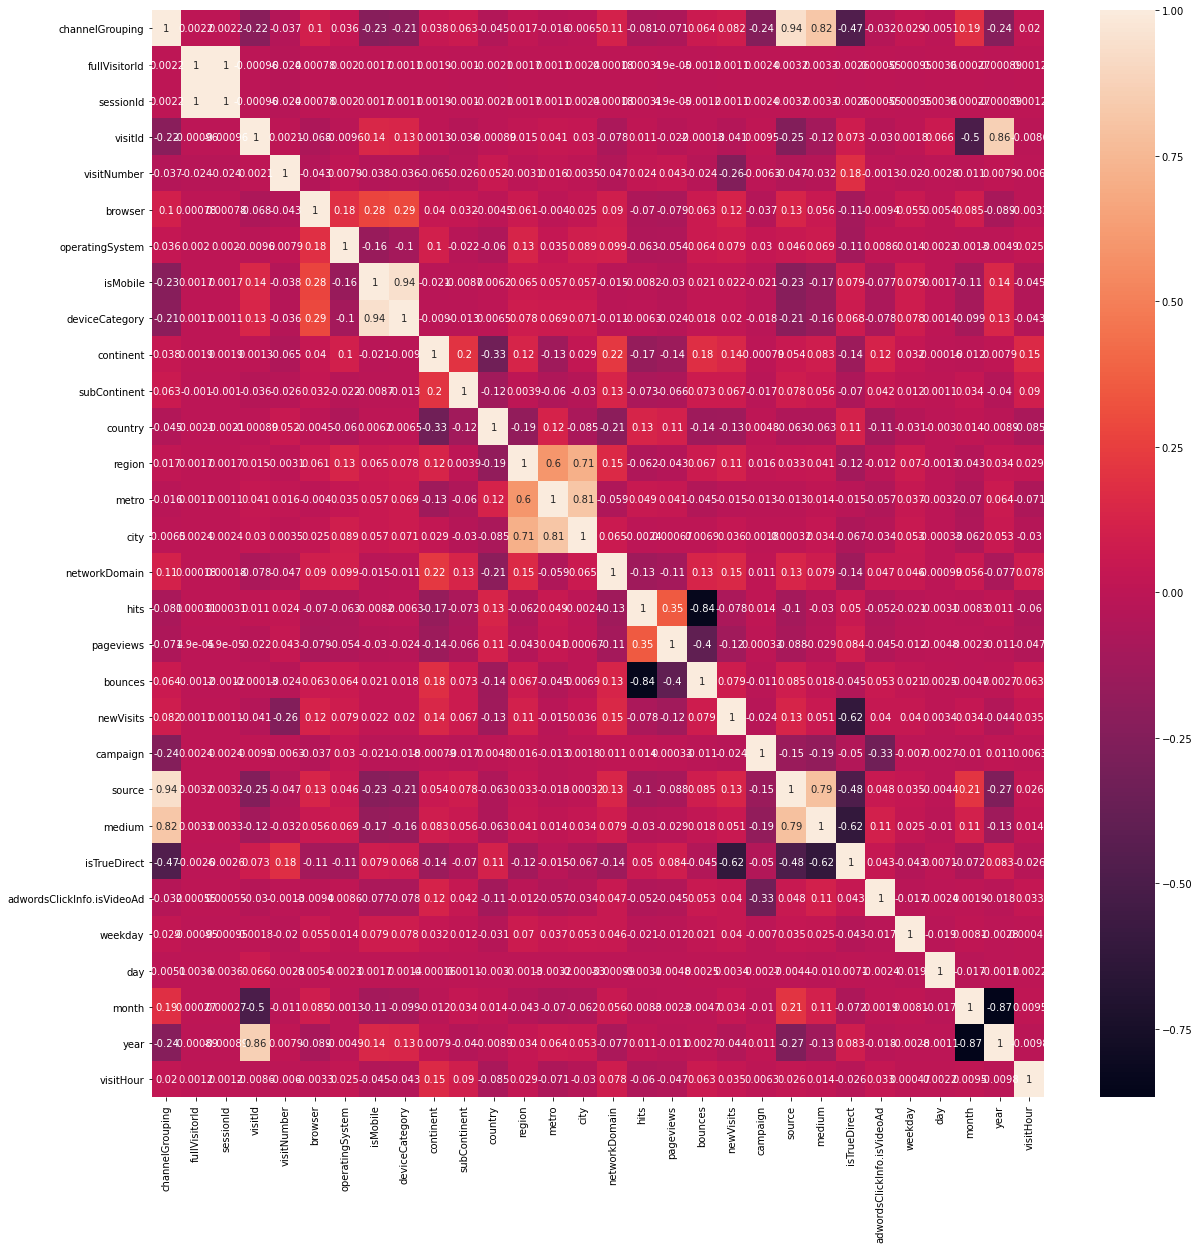

In [100]:
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [101]:
### Now we will drop those features whose correlation is greater then 0.6

In [102]:
threshold=0.5

In [103]:
### Find and remove correlated features

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [104]:
correlation(df.iloc[:,:-1],threshold)

{'bounces',
 'city',
 'deviceCategory',
 'isTrueDirect',
 'medium',
 'metro',
 'month',
 'sessionId',
 'source',
 'year'}

In [105]:
from sklearn.feature_selection import mutual_info_classif

In [106]:
mutual_data=pd.Series(mutual_info_classif(X,y), index=X.columns)

In [107]:
mutual_data.sort_values(ascending=False)

adwordsClickInfo.isVideoAd    0.192341
newVisits                     0.128799
metro                         0.072178
region                        0.070681
city                          0.070562
year                          0.059594
medium                        0.056778
bounces                       0.055105
channelGrouping               0.044351
continent                     0.034344
subContinent                  0.032381
operatingSystem               0.031649
country                       0.025363
browser                       0.023432
source                        0.023372
isTrueDirect                  0.020340
isMobile                      0.015757
weekday                       0.012647
month                         0.009818
deviceCategory                0.006026
visitHour                     0.004237
networkDomain                 0.004054
hits                          0.003335
day                           0.003091
campaign                      0.000070
pageviews                